## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
X = df.drop(columns='median_house_value')
X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  bool   
 9   ocean_proximity_ISLAND      20640 non-null  bool   
 10  ocean_proximity_NEAR BAY    20640 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(8)
memory usage: 1.3 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [4]:
y = df.loc[:,'median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [6]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [7]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,49
O MSE da árvore com profundidade=8 é: 0,76


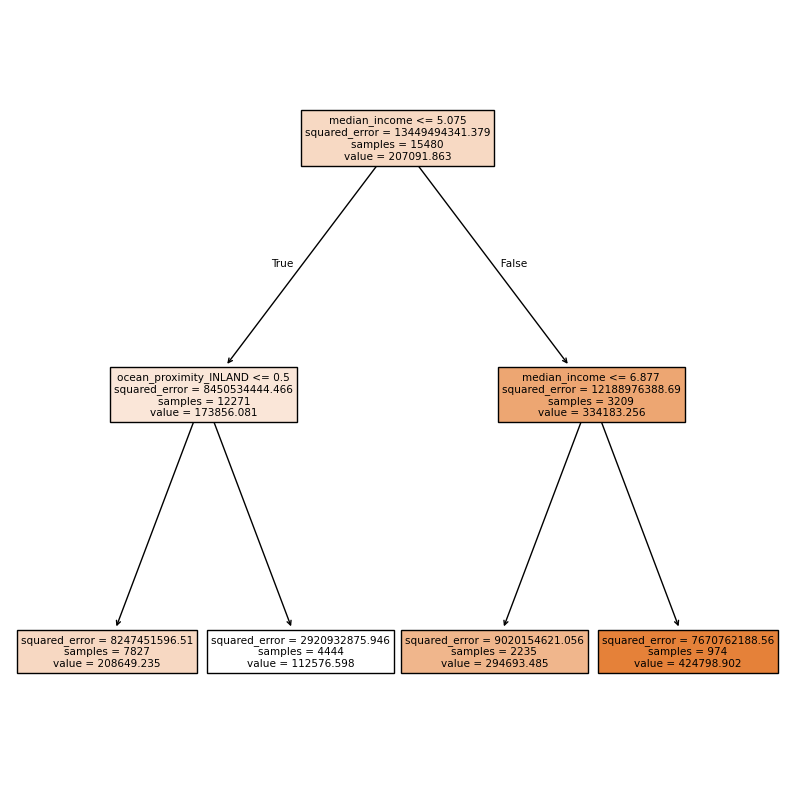

In [8]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [9]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.41799566e+08, 1.69012137e+09, 4.22398185e+09]),
 'impurities': array([6.79359156e+09, 7.53539112e+09, 9.22551249e+09, 1.34494943e+10])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs

[DecisionTreeRegressor(ccp_alpha=np.float64(0.0), random_state=0),
 DecisionTreeRegressor(ccp_alpha=np.float64(741799565.9940262), random_state=0),
 DecisionTreeRegressor(ccp_alpha=np.float64(1690121370.8948984), random_state=0),
 DecisionTreeRegressor(ccp_alpha=np.float64(4223981847.88089), random_state=0)]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [11]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
train_scores

[816168.6047803618, 7535391122.603194, 7535391122.603194, 13449494341.378977]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

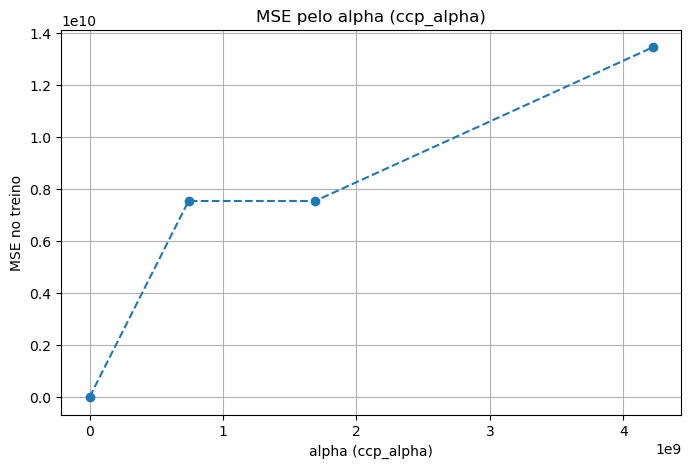

In [12]:
ccp_alphas = [0.0, 7.41799566e+08, 1.69012137e+09, 4.22398185e+09]
train_scores = [816168.6, 7535391122.6, 7535391122.6, 13449494341.3]

# Índice do menor MSE
min_idx = train_scores.index(min(train_scores))

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker="o", linestyle="--")
plt.xlabel("alpha (ccp_alpha)")
plt.ylabel("MSE no treino")
plt.title("MSE pelo alpha (ccp_alpha)")
plt.grid(True)

plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [13]:
# Árvore escolhida
best_tree = clfs[2]

# R² no treino
r2_train = best_tree.score(X_train, y_train)

print("R² no treino:", r2_train)

# R² no teste
r2_test = best_tree.score(X_test, y_test)
print("R² no teste:", r2_test)

R² no treino: 0.4397268082102044
R² no teste: 0.43113227933708487


### 7. Visualize esta árvore.

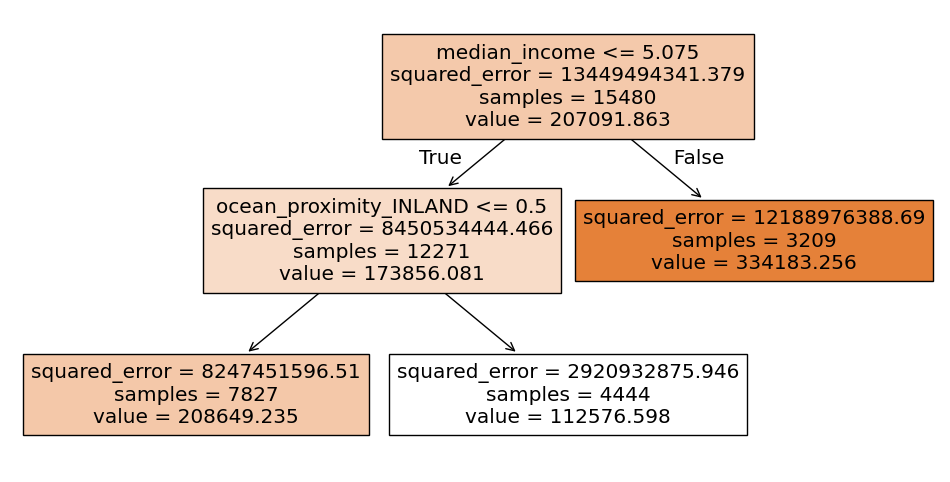

In [14]:
plt.figure(figsize=(12, 6))
plot_tree(best_tree, filled=True, feature_names=X_train.columns)
plt.show()